In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Exploratory Data Analysis

In [167]:
train_data = pd.read_csv("train.csv" , sep=',')

In [168]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [169]:
# Recuperer la taille de la base de données
print('Le nombre des lignes est',train_data.shape[0])
print('Le nombre des colonnes est',train_data.shape[1])

Le nombre des lignes est 1460
Le nombre des colonnes est 81


##### Identifier les valeurs nulles

In [170]:
# les infromations sur la base de donnée
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Récupérer  les valeurs nulles avec leurs pourcentage pour chaque colonne

In [171]:

# parcourir les colonnes de base de données 
for feature in train_data.columns:
    #récuperer les colonnes qui contiennent des valeurs nulles
    if  train_data[feature].isnull().sum() > 0:
        #afficher les pourcentages des valeurs nulles pour chaque colonne
        print(feature,np.round(train_data[feature].isnull().mean(),2)*100 ,"%" )

LotFrontage 18.0 %
Alley 94.0 %
MasVnrType 1.0 %
MasVnrArea 1.0 %
BsmtQual 3.0 %
BsmtCond 3.0 %
BsmtExposure 3.0 %
BsmtFinType1 3.0 %
BsmtFinType2 3.0 %
Electrical 0.0 %
FireplaceQu 47.0 %
GarageType 6.0 %
GarageYrBlt 6.0 %
GarageFinish 6.0 %
GarageQual 6.0 %
GarageCond 6.0 %
PoolQC 100.0 %
Fence 81.0 %
MiscFeature 96.0 %


##### Vérifier si les valeurs nulles affectent -TargetFeature- Sale Price

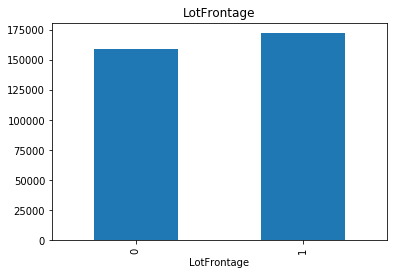

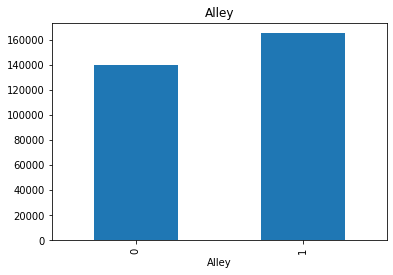

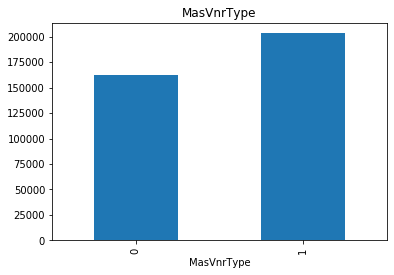

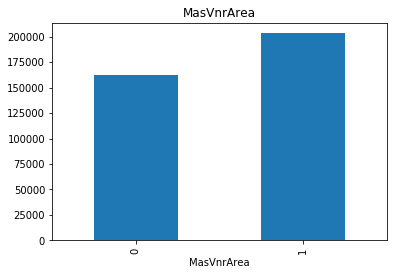

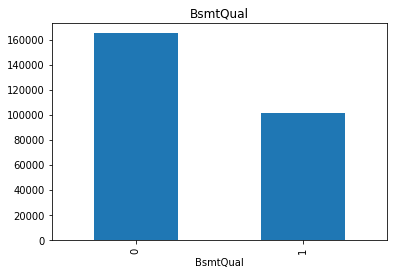

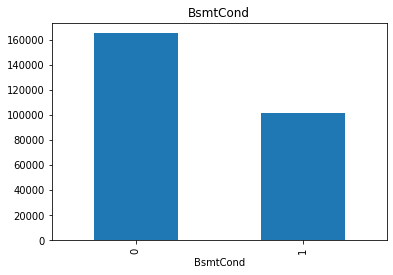

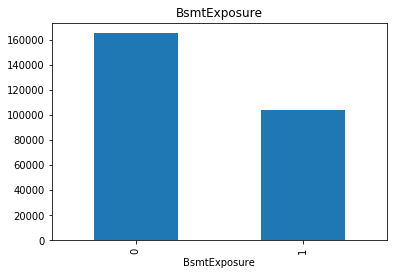

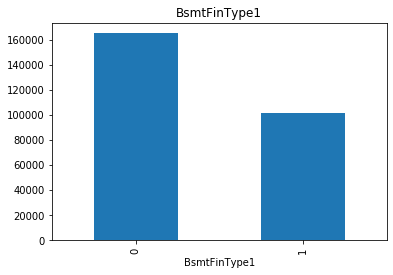

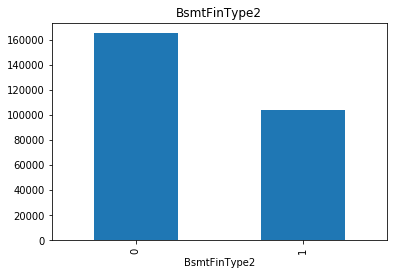

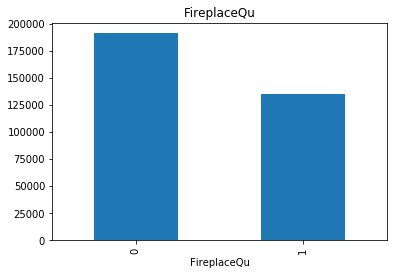

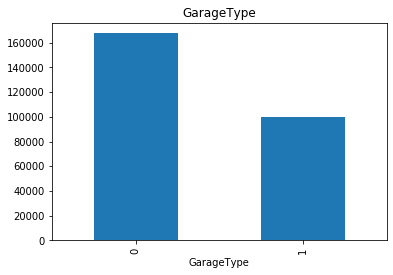

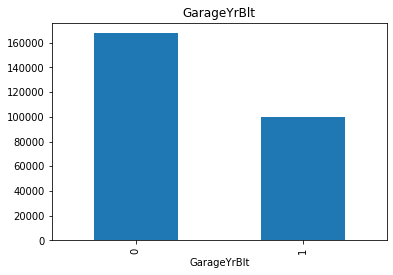

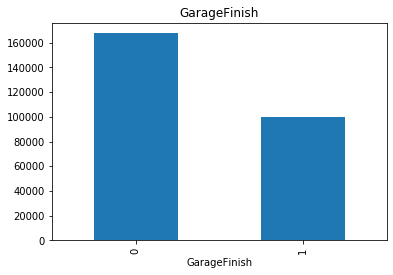

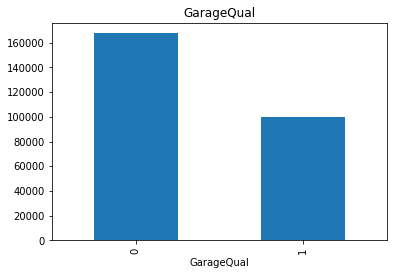

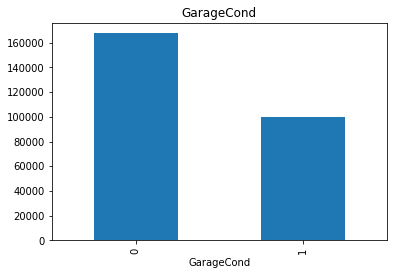

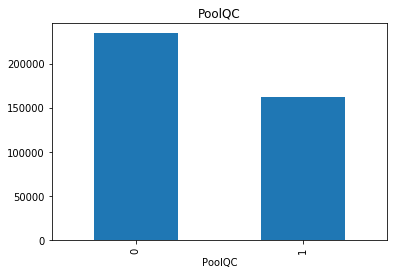

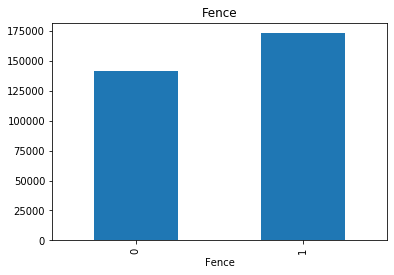

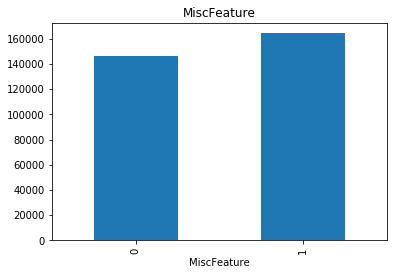

In [172]:
#Stoquer toutes les colonnes contenant des valeurs nulles dans une liste
features_with_null=[features for features in train_data.columns if train_data[features].isnull().sum()>1]

# parcourire cette liste 
for feature in features_with_null:
    #Créer à chaque fois une une copie de la base de donées
    data_copy = train_data.copy()
    
    #Créer une variable qui prend 1 si l'observation est nulle , et 0 sinon
    data_copy[feature] = np.where(data_copy[feature].isnull(), 1, 0)
    
    # calculer la moyenne de prix de vente SalePrice , en les groupant par chaque feature nulle where the information is missing or present
    data_copy.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

 Cette oparation à pour but d'identifier si ces colonnes nulles ont de l'impact sur la prediction du prix de vente -SalePrice-

on peut voir clairement qu'il y a une forte relation avec les valeurs nulles et la variable SalePrice , d'ou la necessité de trouver une méthode pour les remplacer dans la section de Feature Engineering

###### Supprimer la colonne de ID 

In [174]:
train_data.drop(columns = 'Id', axis =1 , inplace = True)

In [49]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### récuperer les varibale représantant les années 

In [94]:
years_features = [feature for feature in train_data.columns if 'Yr' in feature or 'Year' in feature]

In [95]:
# cette liste regroupe toutes les variables des année 
years_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Étudions la chnagenment de SalePrice en fonctions des années 

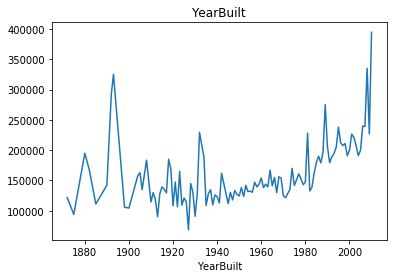

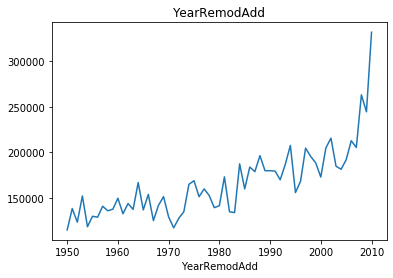

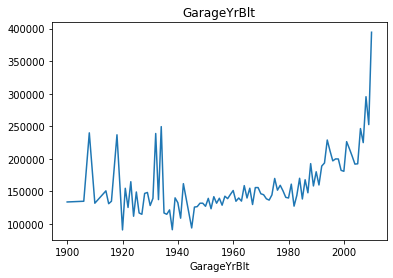

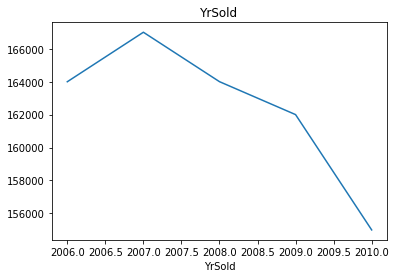

In [96]:
for feature in years_features :
    data_copy.groupby(feature)['SalePrice'].median().plot.line()
    plt.title(feature)
    plt.show()

on peut clairement voir que le prix de vente augmente  avec  l'année de construction , de de remodification et l'année de construction du garage , parcontre me prix diminnue avec l'année de vente 

##### Définir les variables discrètes

In [53]:
discrete_features = [features for features in train_data.columns if len(train_data[features].unique())<25 and features not in features_with_null ]

Definir les valeurs qui peuvent être regroupés et qui ne sont pas nulles , et les rassembler dans une liste discreate_features

In [54]:
discrete_features

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [55]:
train_data[discrete_features].head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,Fireplaces,GarageCars,PavedDrive,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,0,2,Y,0,0,0,2,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,...,1,2,Y,0,0,0,5,2007,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,1,2,Y,0,0,0,9,2008,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,1,3,Y,0,0,0,2,2006,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,...,1,3,Y,0,0,0,12,2008,WD,Normal


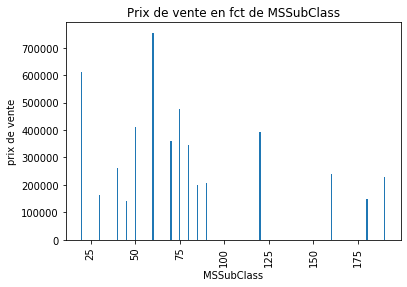

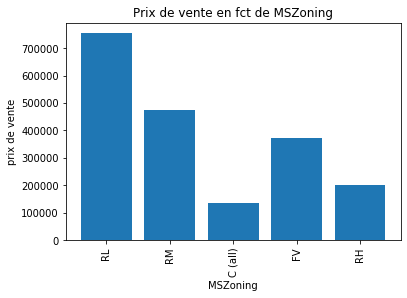

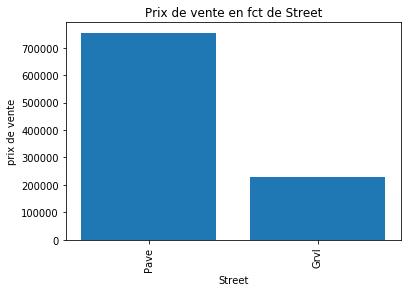

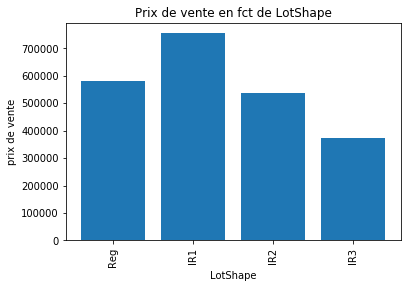

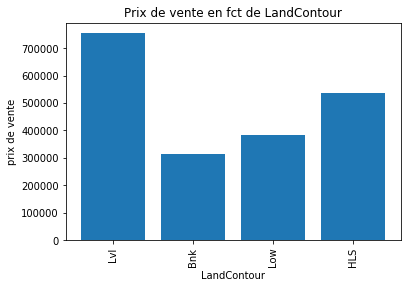

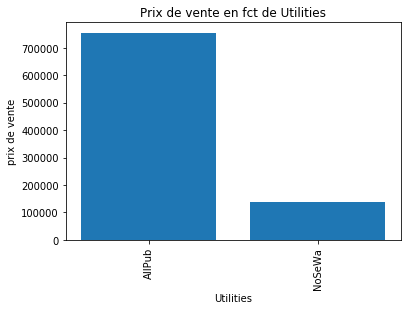

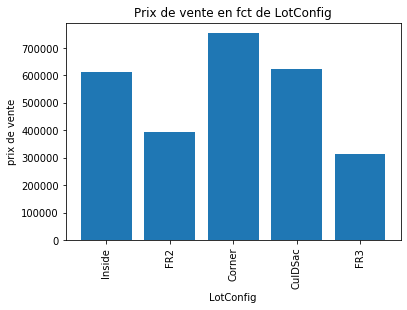

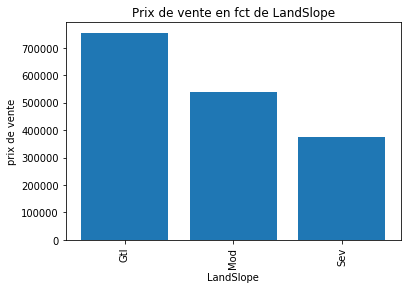

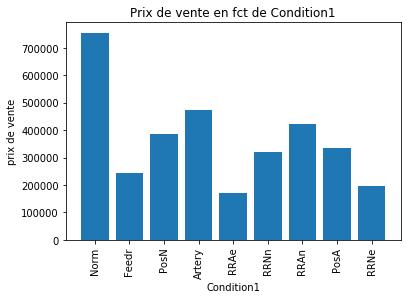

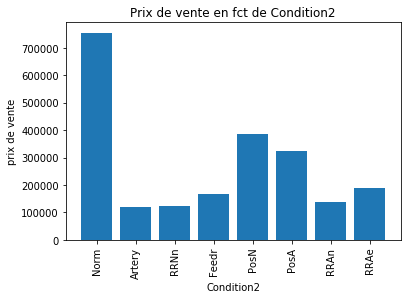

KeyboardInterrupt: 

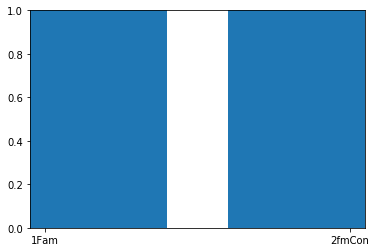

In [56]:
for feature in discrete_features :
    plt.bar(train_data[feature] , train_data.SalePrice)
    plt.xlabel(feature)
    plt.ylabel('prix de vente')
    plt.xticks(rotation='vertical')
    plt.title('Prix de vente en fct de '+feature)
    plt.show()

##### Définir les  variables catégories 

In [ ]:
train_data.info()

In [24]:
categorical_features = [features for features in train_data.columns if train_data[features].dtype == 'O' and features not in features_with_null ]

Definir les les valeurs qui représentesnt des catégories ,cad dtype 'O' ,

In [ ]:
categorical_features

In [ ]:
for feature in categorical_features :
    plt.bar(train_data[feature] , train_data.SalePrice)
    plt.xlabel(feature)
    plt.ylabel('prix de vente')
    plt.xticks(rotation='vertical')
    plt.title('Prix de vente en fct de '+feature)
    plt.show()

on peut distinguer l'impact que jouent les varibales categorical sur le prix de vente

##### Identiifier les variables continus 

In [222]:
continuous_features = [features for features in train_data if features not in years_features and features not in discrete_features and features not in features_with_null]
continuous_features

['LotArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

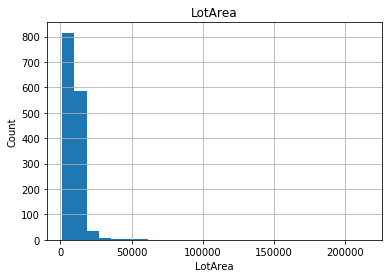

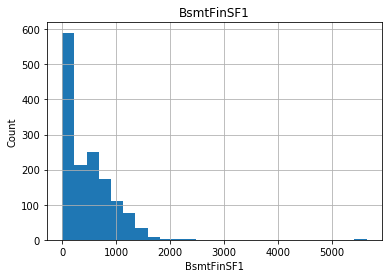

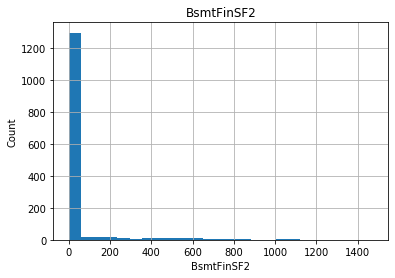

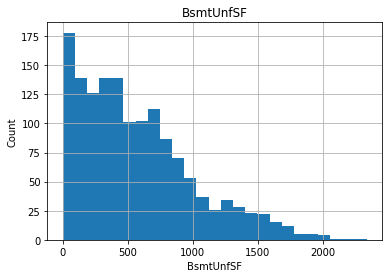

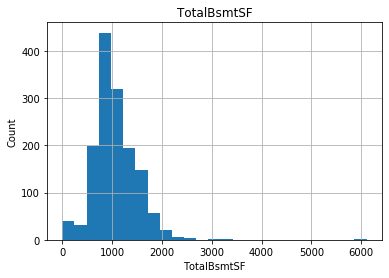

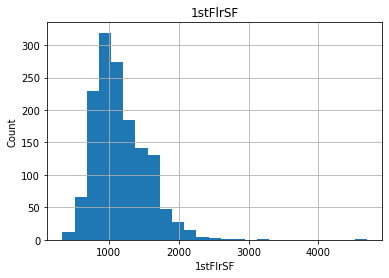

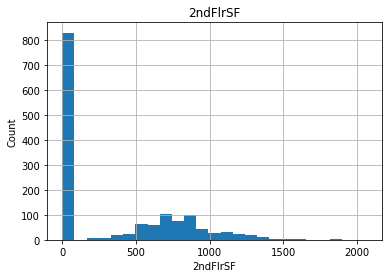

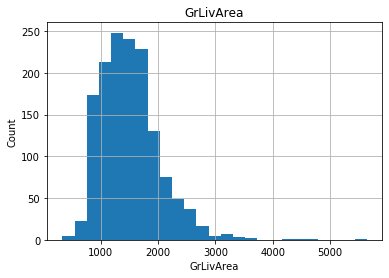

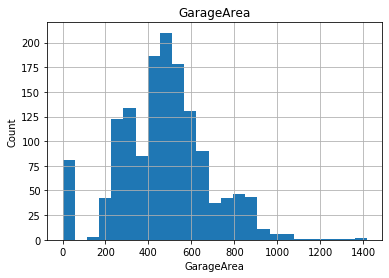

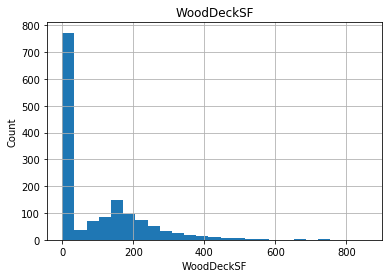

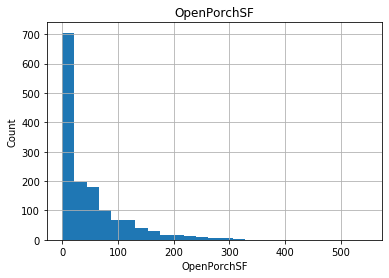

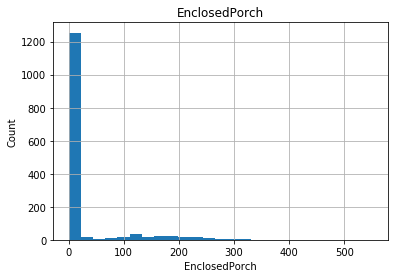

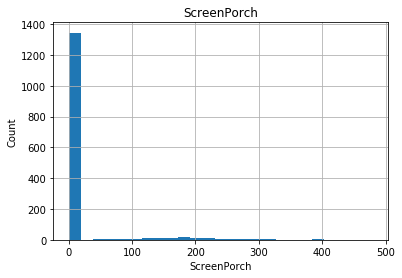

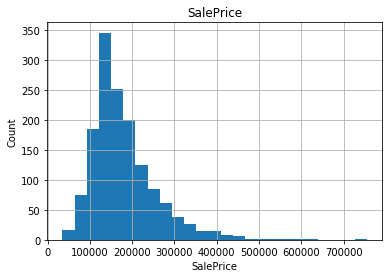

In [223]:
for feature in continuous_features :
    train_data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Cette phase permet de voir les distribution des variables continus de cette base de données, on peut dintinguer que la distubition n'est pas normalisée pour la majorité des varibales , c'est pour ça nous allons la normaliser en utilsant la transformation logarithmique

##### Transofrmation logathmique

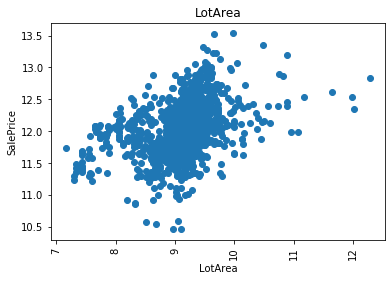

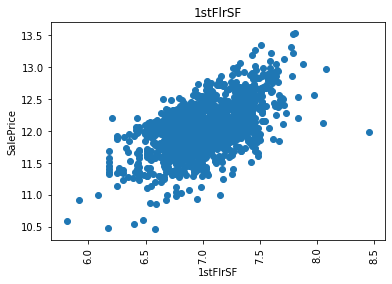

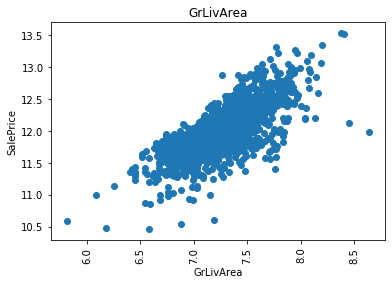

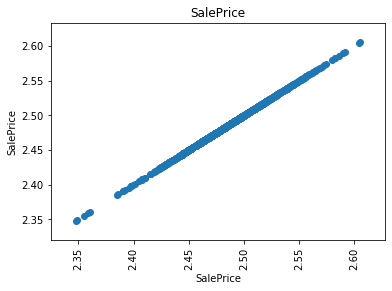

In [231]:
for feature in continuous_features:
    data_copy = train_data.copy()
    if 0 in data_copy[feature].unique():
        pass
    else:
        data_copy[feature] = np.log(data_copy[feature])
        data_copy['SalePrice'] = np.log(data_copy['SalePrice'])
        plt.scatter(data_copy[feature], data_copy['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice',rotation = 'vertical')
        plt.title(feature)
        plt.show()
    

# Feature engineering

##### Les valeurs nulles 

les valeurs nulles affectent la performance d'apprentissage du modèle  pour cette raison nous allons procéder de la manière suivante :
si une colonne contient plus de 75% des valeurs nulles , nous allons supprimer toute la colonne.
sinon on va remplacer les valeurs nulles avec les valeurs moyennes 

In [173]:
print('le nombre des colonnes  est : ' ,len(train_data.columns))

le nombre des colonnes  est :  81


In [150]:
# nous avons rassembler les colonnes qui on plus de 1095 valeurs nulles ==> 60% valeur nulles
col_to_remove =[feature for feature in features_with_null if train_data[feature].isnull().sum() > 876]

In [105]:
col_to_remove

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [160]:
#parcourir les variables qui contiennent des valeurs nulles 
for feature in features_with_null:
    #v"rifier si le taux de des valeurs nulles est supérieur à 75%
    if  feature in col_to_remove:
        # si oui , la colonnes sera supprimée
        train_data.drop(columns= feature, axis =1 , inplace = True)

   # Si la categorie est nulle on la remplace avec une categorie 'U'
    elif train_data[feature].dtype =='O' :
         train_data[feature].fillna('U', inplace=True)
     
    
     #sinon on va remplacer les valeurs nulles par la moyenne de toute la colonne
    else :
        train_data[feature].fillna(train_data[feature].mean(),  inplace=True)
    

KeyError: "['Alley'] not found in axis"

In [152]:
print('le nombre des colonnes  est : ' ,len(train_data.columns))

le nombre des colonnes  est :  76


##### Encoder les variables categories

Pour ceci , nous allons utiliser la méthode one-hot encoding qui permet de creer des colonnes sparées pour chaque type de categorie , donne la valeur 1 si c'est pour le type et 0 sinon .
Nous avons apter pour cette methode au lieu LabelEncoding car cette methode donne un numero pour chaque type de categorie ,ceci peut être interprété par le modèle comme si les valeurs avec le plus grand nombre est celui le plus prioritaire

In [134]:
#cette liste contient les modfication faites sur les valeurs nulles
categorical_features_updated = [feature for feature in train_data if train_data[feature].dtype == 'O']

In [135]:
one_hot_encoded_train_data = pd.get_dummies(train_data, columns = categorical_features_updated)

In [140]:
one_hot_encoded_train_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


###### Réduction des nombres des colonnes 

pour cette fin , nous allons utiliser la technique PCA , pour réduire le nombre des colonnes tout en gardant les mêmes informations

In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
scalar = StandardScaler() 

# fitting 
scalar.fit(one_hot_encoded_train_data)
scaled_data = scalar.transform(one_hot_encoded_train_data)




In [ ]:
from sklearn.decomposition import PCA

# on choisira de résumer les colonnes en 3 colonnes 
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_with_pca = pca.transform(scaled_data)



# Modeling 

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data_with_pca.data,
                                                    data_with_pca.target,
                                                    test_size=0.2,
                                                    random_state=42)


# Create linear regression object
reg = LinearRegression()

# Train the model using the training sets
reg.fit(train_data,train_y)